<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/2348507_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are working for a healthcare analytics company, HealthAnalytics Inc., tasked with building
a linear regression model to predict the medical insurance costs for individuals based on their
attributes. You have been provided with a dataset containing information about several
individuals, including their age, sex, BMI (Body Mass Index), number of children, smoking
status, region, and medical insurance charges.

In [45]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
insurance_data = pd.read_csv('/content/insurance.csv')
insurance_data.head()
insurance_data.shape

(1338, 7)

In [35]:
insurance_data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [36]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Encoding the categorical variables, after this each category is converted into binary columns.

In [37]:
df_encoded = pd.get_dummies(insurance_data,columns = ['sex','smoker','region'])
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


# Build a linear regression model to predict medical insurance costs

In [39]:
X = df_encoded.drop('charges',axis=1)
y = df_encoded['charges']

Split the data set into training and testing to evaluate the model performance

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Building linear regression model

In [41]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

y_pred contains the model's estimated insurance charges for the individuals in the testing dataset.

In [42]:
y_pred = model.predict(X_test)
y_pred

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084137, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

Evaluation metrics to evaluate the performance of the model

In [43]:
# Mean absolute error
mae = mean_absolute_error(y_test,y_pred)
# Mean squared error
mse = mean_squared_error(y_test,y_pred)
# Root mean squared error
rmse = np.sqrt(mse)
# R-squared score
r2 = r2_score(y_test,y_pred)
# Residual sum of squares
rss = np.sum((y_test-y_pred) ** 2)
# Explained variance score
explained_variance = explained_variance_score(y_test,y_pred)
# Adjust R-squared score
n = len(y_test)
p = X_test.shape[1]
adjust_r2 = 1-(1-r2) * ((n-1)/(n-p-1))

In [25]:
print('Mean Absolute error : ',mae)
print('Mean Squared error : ',mse)
print('Root Mean Squared error : ',rmse)
print('R-Squared score : ',r2)
print('Residual sum of squares : ',rss)
print('Explained variance score : ',explained_variance)
print('R-Squared score : ',adjust_r2)

Mean Absolute error :  4187.233928838386
Mean Squared error :  33617342.34527063
Root Mean Squared error :  5798.046424897841
R-Squared score :  0.7834614040176425
Residual sum of squares :  charges    9.009448e+09
charges    9.009448e+09
dtype: float64
Explained variance score :  0.7838170137640617
R-Squared score :  0.7714790311174331


Determine which features have the most significant impact on predicting
medical insurance costs using the trained linear regression model.

In [44]:
feature_names = X_train.columns
coefficients = model.coef_
if len(coefficients.shape)>1:
    coefficients = coefficients[0]
feature_coef = pd.DataFrame({'Feature':feature_names,'Coefficient' : coefficients})
feature_coef['Absolute_Coefficient'] = np.abs(feature_coef['Coefficient'])
feature_coef = feature_coef.sort_values(by='Absolute_Coefficient',ascending=False)
print(feature_coef)

             Feature   Coefficient  Absolute_Coefficient
5          smoker_no -11825.564428          11825.564428
6         smoker_yes  11825.564428          11825.564428
7   region_northeast    459.585244            459.585244
2           children    425.278784            425.278784
10  region_southwest   -350.214110            350.214110
1                bmi    337.092552            337.092552
0                age    256.975706            256.975706
9   region_southeast   -198.279052            198.279052
8   region_northwest     88.907918             88.907918
4           sex_male     -9.295846              9.295846
3         sex_female      9.295846              9.295846


**Observation** : Based on the absolute coefficients, the most significant factors affecting medical insurance costs in the model are smoking status ("smoker_yes" or "smoker_no"). Other factors like region and gender have smaller influence.
"smoker_yes" has large positive coefficient, being a smoker has a positive impact on medical insurance costs.

# Visualization

**Conclusion** : Smoker status stands out the most influencing factor for predicting medical insurance costs

 Create a scatterplot that shows the actual insurance charges vs predicted insurance charges to visualize the model&#39;s performance.

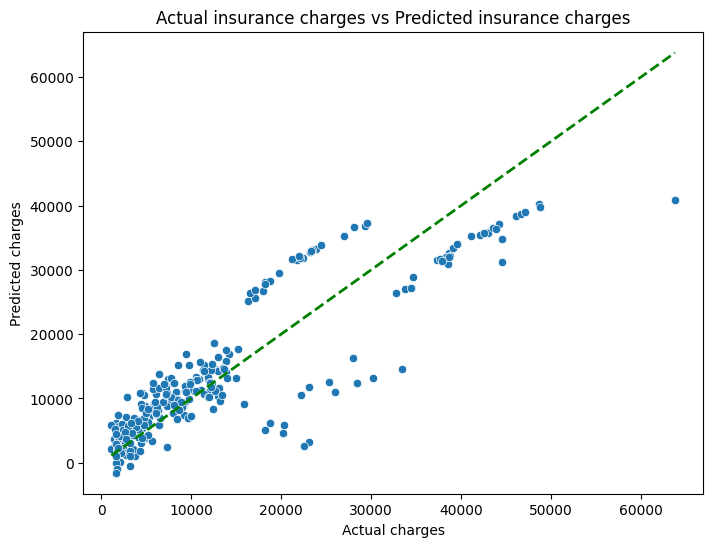

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.title('Actual insurance charges vs Predicted insurance charges')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],linestyle='--',color='green',linewidth = 2)
plt.show()

**Observations** : In this scatter plot, dashed line serves as a reference line, points that are close to this line indicate that the model's predictions are very close to the actual charges. If the points are far away from the line there will be some discrepencies between the model's predictions and actual data.

# Recommendation

Provide insights and recommendations based on your model's performance.
For example, what factors contribute most to higher medical insurance costs? How can
individuals reduce their insurance costs?

**Solution**

In this case smoker status feature contribute most to the higher medical insurance medical costs, individuals suggested to leave smoking in order to reduce their insurance costs.